In [184]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf

In [185]:
nifty50=pd.read_csv('NIFTY50.csv')

In [186]:
symbol=nifty50[['SYMBOL']]
nifty50.columns


Index(['SYMBOL'], dtype='object')

In [ ]:
list=[]
for name, values in nifty50.iteritems():
    for index in values:
        rising_stock=get_history(index,start=datetime(2021,2,1),end=datetime(2021,12,20))
        sublist=[]
        if rising_stock['Open'][-1] < rising_stock['Close'][-1]:
            rising_stock.to_csv("stocks/{index}.csv".format(index=index))
            rising_stock.index.name = 'Date'
            short_window = 44
            rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=short_window).mean()
            sublist.append(index)
            list.append(sublist)
            print(index)
    #print('{name}: {value}'.format(name=name, value=values))
data=pd.DataFrame(list,columns=["SYMBOL"])
data.to_csv("stocks/rising_stocks.csv")

RELIANCE
ADANIPORTS
GRASIM
M&M
COALINDIA
HDFCBANK
HDFC
INDUSINDBK
KOTAKBANK
EICHERMOT
DIVISLAB
BHARTIARTL
ITC
HDFCLIFE
TATACONSUM


In [195]:
tcs=get_history('TCS',start=datetime(2021,2,1),end=datetime(2021,12,20))

Exception in thread Exception in thread Thread-1380:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
Thread-1382:
Exception in thread Thread-1383:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
        httplib_response = self._make_request(
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
httplib_response = self._make_request(
    six.raise_from(e, None)
      File "<string>", line 3, in raise_from
  File "D:\Anaconda\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
six.raise_from(e, None)
  File "<string>", line 3, in 

    return self.request('GET', url, **kwargs)
  File "D:\Anaconda\lib\site-packages\requests\sessions.py", line 530, in request
    raise ConnectionError(err, request=request)
    requests.exceptions.resp = self.send(prep, **send_kwargs)
  File "D:\Anaconda\lib\site-packages\requests\sessions.py", line 665, in send
ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))
    history = [resp for resp in gen]
  File "D:\Anaconda\lib\site-packages\requests\sessions.py", line 665, in <listcomp>
    history = [resp for resp in gen]
  File "D:\Anaconda\lib\site-packages\requests\sessions.py", line 237, in resolve_redirects
    resp = self.send(
  File "D:\Anaconda\lib\site-packages\requests\sessions.py", line 643, in send
    r = adapter.send(request, **kwargs)
  File "D:\Anaconda\lib\

AttributeError: 'ThreadReturns' object has no attribute 'result'

In [94]:
tcs.to_csv("TCS.csv")

In [169]:
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe

### We need to define a window: Short term window 
### and plot the graph with points where upturn and downturn happen

for name, values in nifty50.iteritems():
    for index in values:
        stock = pd.read_csv('stocks/{index}.csv'.format(index=index),index_col=0,parse_dates=True)
        stock.index.name = 'Date'
        short_window = 44
        stock["44_obs_for_SMA"] = stock["Close"].rolling(window=short_window).mean()
stock.tail(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,44_obs_for_SMA
Date,,,,,,,,,,,,,,,
2021-05-26,SUNPHARMA,EQ,696.1,699.50,706.15,696.2,704.25,703.80,702.93,6235460,4.383091e+14,88537,847920,0.1360,645.809091
2021-05-27,SUNPHARMA,EQ,703.8,707.25,709.75,694.5,700.50,699.50,700.88,9875654,6.921639e+14,111629,2420059,0.2451,648.563636
2021-05-28,SUNPHARMA,EQ,699.5,694.00,694.50,666.3,672.65,669.75,674.93,28316552,1.911166e+15,367944,13771421,0.4863,650.353409


In [98]:
plt.style.use('ggplot')

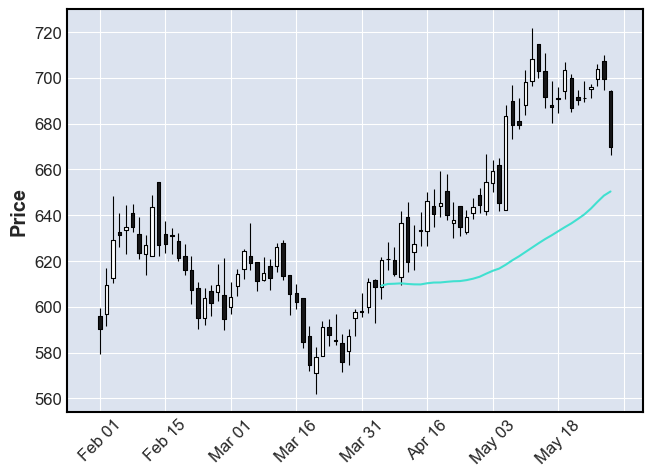

In [171]:
mpf.plot(stock,type='candle',mav=44)

In [119]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

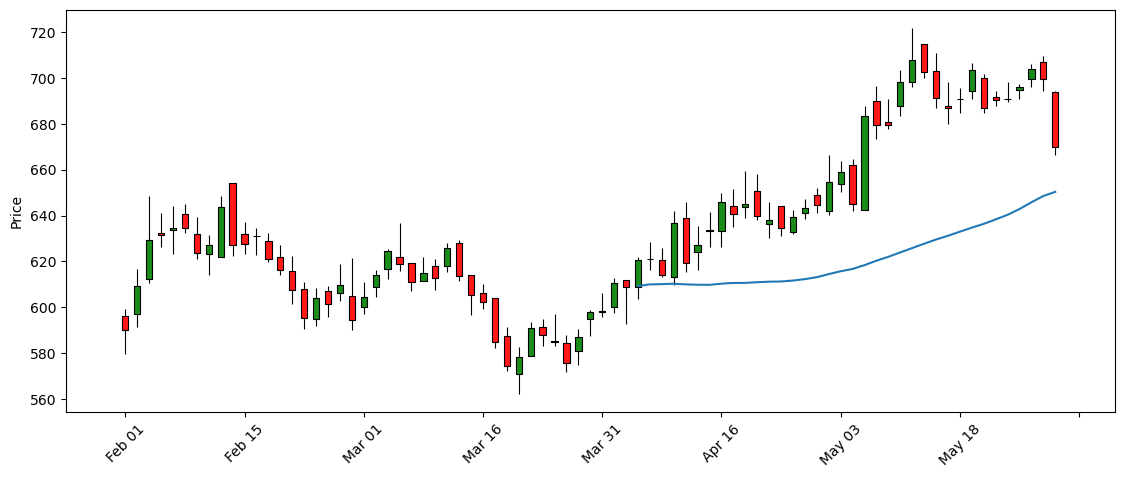

In [173]:
mpf.plot(daily,type='candle',figratio=(38,15),mav=44,style=s)